In [11]:
import pandas as pd
import numpy as np

air_df = pd.read_csv('air.csv')
income_df = pd.read_csv('income.csv')

In [12]:
air_df.head()

,County,FIPS,Micrograms per cubic meter (PM2.5)(1)
0,Mono County,6051,39.1
1,Mariposa County,6043,21.3
2,Kern County,6029,21.1
3,Plumas County,6063,21.1
4,Tulare County,6107,20.8


In [13]:
income_df.head()

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
0,Trinity County,6105,"53,498","2,457"
1,Siskiyou County,6093,"55,499","2,309"
2,Imperial County,6025,"56,393","2,246"
3,Modoc County,6049,"56,648","2,221"
4,Lake County,6033,"58,738","2,055"


In [14]:
merged_df = pd.merge(air_df, income_df, on='County', how='inner')
merged_df['Value (Dollars)'] = merged_df['Value (Dollars)'].str.replace(',', '')
merged_df['Value (Dollars)'] = pd.to_numeric(merged_df['Value (Dollars)'])

merged_df.head()

,County,FIPS_x,Micrograms per cubic meter (PM2.5)(1),FIPS_y,Value (Dollars),Rank within US (of 3141 counties)
0,Mono County,6051,39.1,6051,86953,313
1,Mariposa County,6043,21.3,6043,65378,"1,392"
2,Kern County,6029,21.1,6029,67660,"1,234"
3,Plumas County,6063,21.1,6063,64946,"1,436"
4,Tulare County,6107,20.8,6107,69489,"1,095"


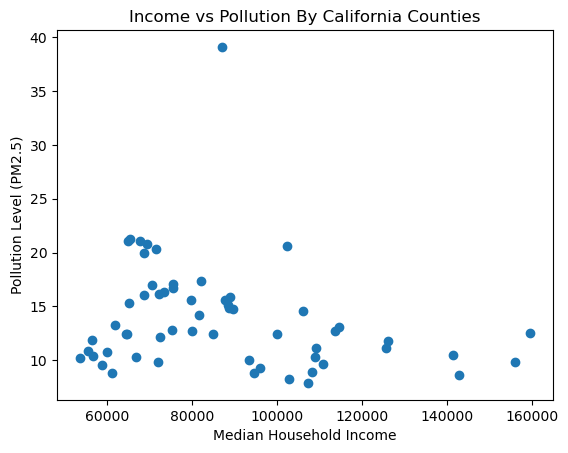

In [ ]:
import matplotlib.pyplot as plt

plt.plot(merged_df['Value (Dollars)'], merged_df['Micrograms per cubic meter (PM2.5)(1)'], 'o')
plt.title('Income vs Pollution By California Counties')
plt.xlabel('Median Household Income')
plt.ylabel('Pollution Level (PM2.5)')

# Save the plot to the Hugo content directory
plt.savefig('../../content/miniprojects/miniproject1/income_vs_pollution_scatter.png', dpi=300, bbox_inches='tight')

plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = merged_df[['Value (Dollars)']]  

y = merged_df["Micrograms per cubic meter (PM2.5)(1)"]


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2: {model.score(X,y)}")

Coefficient: -4.722561935717909e-05
Intercept: 17.984544692537984
R^2: 0.0576489015252889


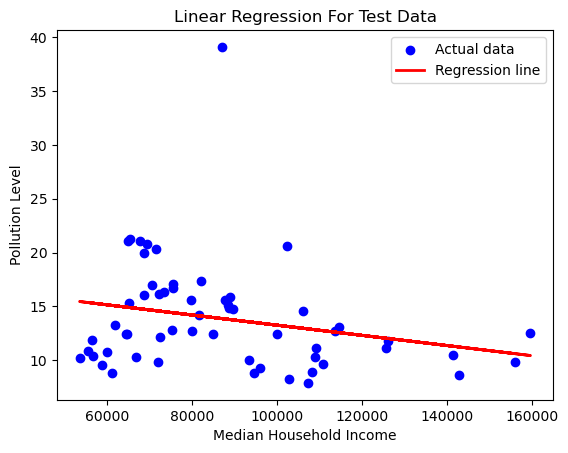

In [17]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Median Household Income')
plt.ylabel('Pollution Level')
plt.title('Linear Regression For Test Data')
plt.legend()
plt.show()

In [ ]:
plt.savefig('../../content/miniprojects/miniproject1/income_vs_pollution_scatter.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>